# Generate random numbers following a PDF

In [1]:
import numpy as np
import scipy.integrate as integrate
import matplotlib.pyplot as plt

## Inverse CDF

In [2]:
F = integrate.quad( lambda x: x**2, 0, 1)
F

(0.3333333333333333, 3.700743415417188e-15)

In [3]:
def x2(x):
    return x**2/F[0]

In [4]:
integrate.quad( x2, 0, 1 )

(1.0000000000000002, 1.1102230246251569e-14)

In [5]:
theta = np.linspace(0, np.pi/2, 200)
costh = np.cos(theta)

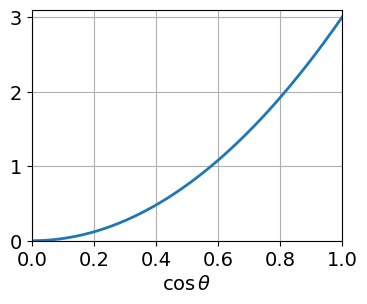

In [6]:
fig, ax = plt.subplots( figsize = (4, 3) )  
ax.plot(costh, x2(costh), lw = 2 )

ax.set_xlabel( r'$\cos\theta$', fontsize = 14 )
# ax.set_ylabel( r'Cosmic muon flux [Hz]', fontsize = 16 )
ax.tick_params(axis = 'x', labelsize = 14)
ax.tick_params(axis = 'y', labelsize = 14)
ax.set_xlim( [0, 1])
ax.set_ylim( [0, 3.1])

ax.grid(":")
# ax.legend( fontsize = 16 )

In [7]:
def cdf(costh):
    return (1.-costh**3)/(3*F[0])

In [8]:
def inv_cdf(c):
    return np.cbrt(1-3*c*F[0])

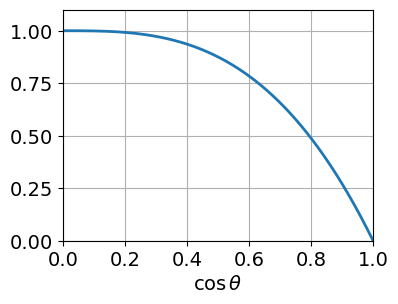

In [9]:
fig, ax = plt.subplots( figsize = (4, 3) )  
ax.plot(costh, cdf(costh), lw = 2 )

ax.set_xlabel( r'$\cos\theta$', fontsize = 14 )
# ax.set_ylabel( r'Cosmic muon flux [Hz]', fontsize = 16 )
ax.tick_params(axis = 'x', labelsize = 14)
ax.tick_params(axis = 'y', labelsize = 14)
ax.set_xlim( [0, 1])
ax.set_ylim( [0, 1.1])

ax.grid(":")

In [10]:
# randSolidAngle = np.array([
#     [costh, phi]
#     for costh, phi in zip(np.random.default_rng().uniform(0, 1, 10000), np.random.default_rng().uniform(0, 2*np.pi, 10000))])

nSamples = 10000
rng = np.random.default_rng()
uniformCosth = rng.uniform(0, 1, nSamples)
SolidAngle = np.array([
    [costh, phi]
    for costh, phi in zip(inv_cdf(uniformCosth), rng.uniform(0, 2*np.pi, nSamples))])
SolidAngle

array([[0.79388384, 3.04925424],
       [0.91124474, 1.82367932],
       [0.67401014, 3.66342315],
       ...,
       [0.98184313, 5.22652283],
       [0.83877983, 2.11394821],
       [0.7360178 , 2.70262425]])

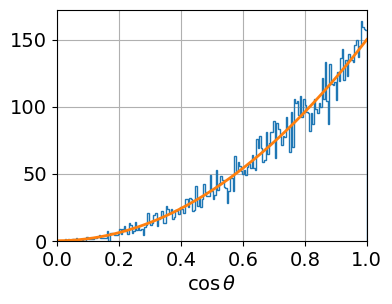

In [11]:
fig, ax = plt.subplots( figsize = (4, 3) )  

ax.hist(SolidAngle[:,0], bins = np.linspace(0, 1, 200), histtype = 'step')
ax.plot(costh, x2(costh)*50, lw = 2 )

ax.set_xlabel( r'$\cos\theta$', fontsize = 14 )
# ax.set_ylabel( r'Cosmic muon flux [Hz]', fontsize = 16 )
ax.tick_params(axis = 'x', labelsize = 14)
ax.tick_params(axis = 'y', labelsize = 14)
ax.set_xlim( [0, 1])
# ax.set_ylim( [0, 1.1])

ax.grid(":")
# ax.legend( fontsize = 16 )

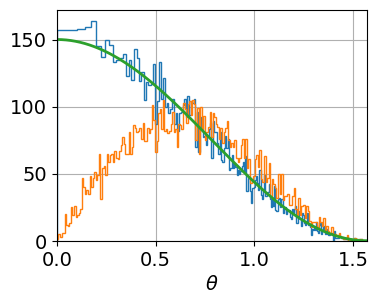

In [12]:
arccosbin = np.arccos(np.linspace(0, 1, 200))
fig, ax = plt.subplots( figsize = (4, 3) )  

ax.hist(np.arccos(SolidAngle[:,0]), bins = np.flip(arccosbin), histtype = 'step')
ax.hist(np.arccos(SolidAngle[:,0]), bins = np.linspace(0, np.pi/2, 200), histtype = 'step')
ax.plot(np.arccos(costh), x2(costh)*50, lw = 2 )

ax.set_xlabel( r'$\theta$', fontsize = 14 )
# ax.set_ylabel( r'Cosmic muon flux [Hz]', fontsize = 16 )
ax.tick_params(axis = 'x', labelsize = 14)
ax.tick_params(axis = 'y', labelsize = 14)
ax.set_xlim( [0, np.pi/2])
# ax.set_ylim( [0, 1.1])

ax.grid(":")
# ax.legend( fontsize = 16 )

In [38]:
# np.set_printoptions(threshold=np.inf)
# inv_cdf(randSolidAngle[:,0])

array([0.92197521, 0.93597681, 0.93914107, 0.74204039, 0.83358651,
       0.8285485 , 0.87687717, 0.90886668, 0.78713596, 0.78605401,
       0.94548454, 0.93665471, 0.99217931, 0.5984996 , 0.88032116,
       0.7064072 , 0.49927747, 0.75943663, 0.90406789, 0.9131707 ,
       0.84421042, 0.94294027, 0.55579698, 0.87193838, 0.68477491,
       0.99766423, 0.45987528, 0.54749323, 0.9283203 , 0.99176134,
       0.41851033, 0.43267451, 0.85952159, 0.68959111, 0.98551476,
       0.84944076, 0.96184306, 0.58681734, 0.30932049, 0.96932876,
       0.29272685, 0.7236866 , 0.40984321, 0.82694998, 0.4788499 ,
       0.76187344, 0.98722224, 0.90959621, 0.66086796, 0.96761553,
       0.43762381, 0.9244035 , 0.95744835, 0.42894605, 0.90163276,
       0.63431713, 0.29415027, 0.5711574 , 0.84849715, 0.91346565,
       0.46276883, 0.79331307, 0.56083541, 0.9699759 , 0.74001432,
       0.5142903 , 0.70251402, 0.29587366, 0.96376479, 0.85205531,
       0.90966659, 0.92889832, 0.82153395, 0.86814893, 0.54302

In [13]:
theta = np.linspace(0, np.pi/2, 200)

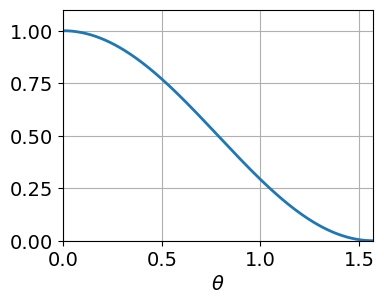

In [14]:
fig, ax = plt.subplots( figsize = (4, 3) )  

ax.plot(theta, np.cos(theta)**2, lw = 2 )

ax.set_xlabel( r'$\theta$', fontsize = 14 )
# ax.set_ylabel( r'Cosmic muon flux [Hz]', fontsize = 16 )
ax.tick_params(axis = 'x', labelsize = 14)
ax.tick_params(axis = 'y', labelsize = 14)
ax.set_xlim( [0, np.pi/2])
ax.set_ylim( [0, 1.1])

ax.grid(":")
# ax.legend( fontsize = 16 )

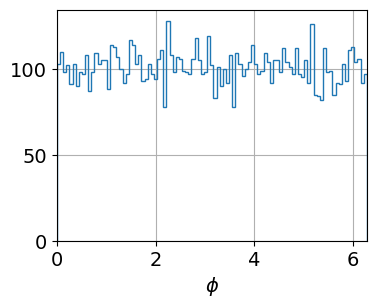

In [15]:
fig, ax = plt.subplots( figsize = (4, 3) )  

ax.hist(SolidAngle[:,1], bins = np.linspace(0, 2*np.pi, 100), histtype = 'step')

ax.set_xlabel( r'$\phi$', fontsize = 14 )
# ax.set_ylabel( r'Cosmic muon flux [Hz]', fontsize = 16 )
ax.tick_params(axis = 'x', labelsize = 14)
ax.tick_params(axis = 'y', labelsize = 14)
ax.set_xlim( [0, 2*np.pi])
# ax.set_ylim( [0, 1.1])

ax.grid(":")
# ax.legend( fontsize = 16 )

## Von Neumann Rejection Sampling

Use the energy spectrum of cosmic rays as an example.  According to PDG, the energy spectrum essentially follows power law:

$I(E) = E^{\gamma}$, where $\gamma\sim$2.7

In [2]:
def EPowerLaw(E):
    return E**(-2.7)

In [3]:
E = np.arange(1., 10., 0.01)

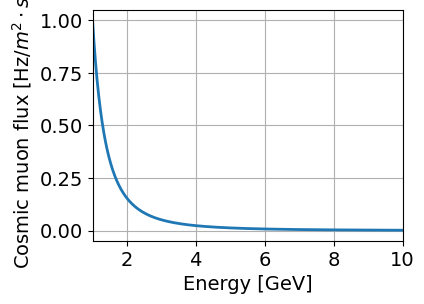

In [4]:
fig, ax = plt.subplots( figsize = (4, 3) )  

ax.plot(E, EPowerLaw(E), lw = 2 )

ax.set_xlabel( r'Energy [GeV]', fontsize = 14 )
ax.set_ylabel( r'Cosmic muon flux [Hz/$m^2\cdot sr$]', fontsize = 14 )
ax.tick_params(axis = 'x', labelsize = 14)
ax.tick_params(axis = 'y', labelsize = 14)
ax.set_xlim( [1, 10])
# ax.set_ylim( [0, 1.1])

ax.grid(":")
# ax.legend( fontsize = 16 )

In [5]:
I1 = integrate.quad( EPowerLaw, 1, 2)
I2 = integrate.quad( EPowerLaw, 2, 4)
I3 = integrate.quad( EPowerLaw, 4, 10)
I4 = integrate.quad( EPowerLaw, 10, 10000)
I5 = integrate.quad( EPowerLaw, 1, 10000)
I1, I2, I3, I4, I5

((0.40718464509633584, 4.520657682597749e-15),
 (0.12532577525254657, 1.3913956126437485e-15),
 (0.043988036621888854, 1.2309603880551627e-14),
 (0.011736743917865508, 9.492305350727555e-09),
 (0.5882352008886356, 5.713086664880246e-10))

In [6]:
dImax = EPowerLaw(1.)
dImax

1.0

In [7]:
rng = np.random.default_rng()

In [8]:
nSamples = 100000

In [9]:
def getNSamples(xmin, xmax, N):
    return rng.uniform(xmin, xmax, N)

In [10]:
def isAccepted(v, vPDF, maxPDF):
    return rng.uniform(0., maxPDF, v.size) < vPDF

In [11]:
def rejectSampling(Emin, Emax, nSamples):
    outNSamples = getNSamples(Emin, Emax, nSamples)
    outPDF = EPowerLaw(outNSamples)
    maxPDF = EPowerLaw(Emin)

    mask = isAccepted(outNSamples, outPDF, maxPDF)
    reject, = np.where(~mask)

    while reject.size > 0:
        fill = getNSamples(Emin, Emax, reject.size)
        fillPDF = EPowerLaw(fill)
        mask = isAccepted(fill, fillPDF, maxPDF)
        outNSamples[reject[mask]] = fill[mask]
        reject = reject[~mask]

    return outNSamples

In [12]:
vEmin = np.array([1., 2., 4.])
vEmax = np.array([2., 4., 10.])
vNorm = np.array([ integrate.quad( EPowerLaw, Emin, Emax)
                  for Emin, Emax in zip(vEmin, vEmax) ])
voutSamples = np.array([ rejectSampling(Emin, Emax, nSamples)
                         for Emin, Emax in zip(vEmin, vEmax)])
vNorm

array([[4.07184645e-01, 4.52065768e-15],
       [1.25325775e-01, 1.39139561e-15],
       [4.39880366e-02, 1.23096039e-14]])

In [13]:
vNBins = np.array([50, 100, 300])
vRangeFactor = np.array([1., 2., 6.])
E = np.arange(vEmin[0], vEmax[0]+0.01, 0.01)
vFactor = vNorm[:,0]/vNorm[0][0]
vFactor

array([1.       , 0.3077861, 0.1080297])

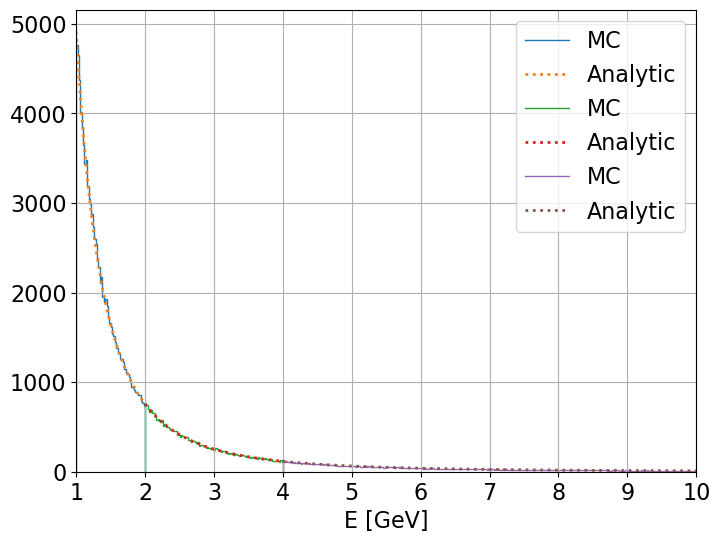

In [14]:
fig, ax = plt.subplots( figsize = (8, 6) )  

for Emin, Emax, outSamples, rFactor, factor, NBins in \
    zip( vEmin, vEmax, voutSamples, vRangeFactor, vFactor, vNBins ):
    Ehist = np.histogram(outSamples, NBins, (Emin, Emax))
    ax.stairs(Ehist[0]*factor, Ehist[1], label = 'MC')
    E = np.arange(Emin, Emax+0.01, 0.01)
    ax.plot(E, EPowerLaw(E)/vNorm[0][0]*nSamples/NBins*rFactor, lw = 2, linestyle = 'dotted', label = 'Analytic' )

ax.set_xlabel( r'E [GeV]', fontsize = 16 )
# ax.set_ylabel( r'Cosmic muon flux [Hz]', fontsize = 16 )
ax.tick_params(axis = 'x', labelsize = 16)
ax.tick_params(axis = 'y', labelsize = 16)
ax.set_xlim( [1, 10])

ax.grid(":")
ax.legend( fontsize = 16 )
fig.savefig('RejectSampling.png')

### Try the sampling size propotional to the probability

In [15]:
vSampleSize = np.round(nSamples*vFactor)
vSampleSize

array([100000.,  30779.,  10803.])

In [16]:
E0 = voutSamples[0]
E1 = voutSamples[1][0:30779]
E2 = voutSamples[2][0:10803]
len(E2)

10803

In [17]:
E0Hist = np.histogram(E0, vNBins[0], (vEmin[0], vEmax[0])) 
E1Hist = np.histogram(E1, vNBins[1], (vEmin[1], vEmax[1]))
E2Hist = np.histogram(E2, vNBins[2], (vEmin[2], vEmax[2]))

In [18]:
E0Hist

(array([4766, 4650, 4368, 4012, 3848, 3650, 3438, 3482, 3190, 3046, 2991,
        2872, 2735, 2595, 2537, 2387, 2287, 2109, 2170, 1953, 1894, 1933,
        1850, 1726, 1662, 1611, 1540, 1511, 1443, 1377, 1330, 1325, 1255,
        1259, 1223, 1148, 1107, 1095, 1057,  998,  945,  930,  911,  891,
         876,  861,  862,  789,  766,  739]),
 array([1.  , 1.02, 1.04, 1.06, 1.08, 1.1 , 1.12, 1.14, 1.16, 1.18, 1.2 ,
        1.22, 1.24, 1.26, 1.28, 1.3 , 1.32, 1.34, 1.36, 1.38, 1.4 , 1.42,
        1.44, 1.46, 1.48, 1.5 , 1.52, 1.54, 1.56, 1.58, 1.6 , 1.62, 1.64,
        1.66, 1.68, 1.7 , 1.72, 1.74, 1.76, 1.78, 1.8 , 1.82, 1.84, 1.86,
        1.88, 1.9 , 1.92, 1.94, 1.96, 1.98, 2.  ]))

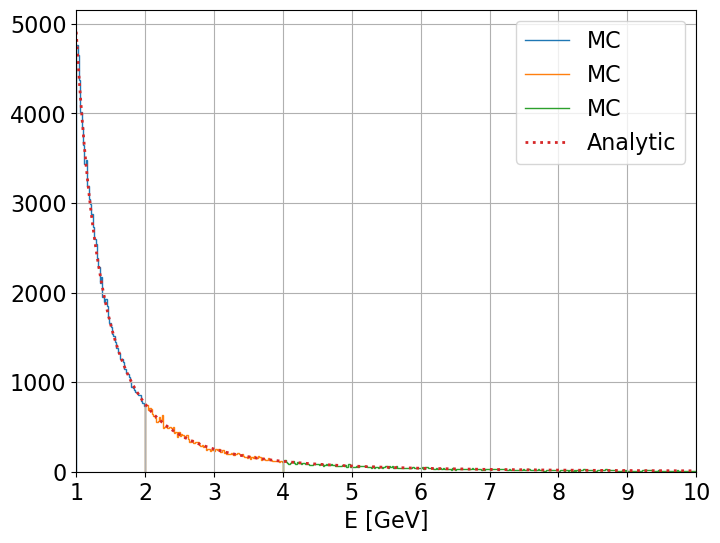

In [30]:
fig, ax = plt.subplots( figsize = (8, 6) )  

ax.stairs(E0Hist[0], E0Hist[1], label = 'MC')
ax.stairs(E1Hist[0], E1Hist[1], label = 'MC')
ax.stairs(E2Hist[0], E2Hist[1], label = 'MC')
E = np.arange(1., 10.+0.01, 0.01)
ax.plot(E, EPowerLaw(E)/vNorm[0][0]*nSamples/vNBins[0], lw = 2, linestyle = 'dotted', label = 'Analytic' )

ax.set_xlabel( r'E [GeV]', fontsize = 16 )
# ax.set_ylabel( r'Cosmic muon flux [Hz]', fontsize = 16 )
ax.tick_params(axis = 'x', labelsize = 16)
ax.tick_params(axis = 'y', labelsize = 16)
ax.set_xlim( [1, 10])

ax.grid(":")
ax.legend( fontsize = 16 )
fig.savefig('RejectSamplingSize.png')